In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date
from datetime import datetime as dt

In [2]:
Sales_Data=pd. read_csv("C:/Users/Vishal/Desktop/Python/6. Pandas Case Study 4 - Python Visualizations Case Study/SalesData.csv")

Sales_Data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


1. The total sales of 2015 and 2016 is shown wrt Regions


Text(0, 0.5, 'Total Sales')

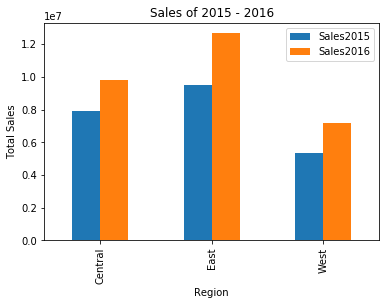

In [3]:
print("1. The total sales of 2015 and 2016 is shown wrt Regions")

Sales_Data.groupby('Region')[['Sales2015','Sales2016']].sum().plot.bar()

plt.title('Sales of 2015 - 2016')
plt.ylabel('Total Sales')


2. Pie charts for sales for each region in 2016 


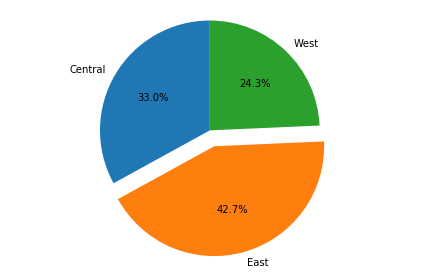

In [4]:
print("2. Pie charts for sales for each region in 2016 ")

Pie_table=Sales_Data.groupby('Region')[['Sales2016']].sum().reset_index()

plt.pie(Pie_table['Sales2016'],labels=Pie_table['Region'],explode=(0, 0.15,0,),startangle=90,autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.show()

3. The sales of 2015 and 2016 wih respect to region and tier is


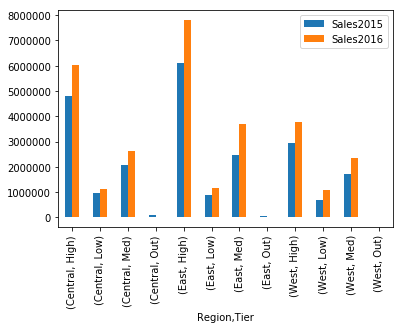

In [5]:
print("3. The sales of 2015 and 2016 wih respect to region and tier is")

Sales_Data.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum().plot.bar()

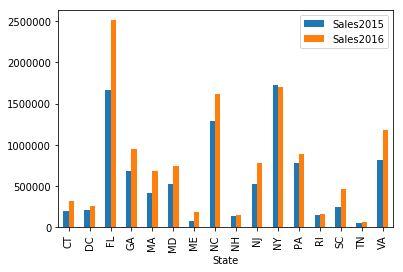

In [6]:
East_table=Sales_Data[Sales_Data.Region=='East']

East_table.groupby('State')[['Sales2015','Sales2016']].sum().plot.bar()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


4. Thus we can conclude that there is just one state in which the total sales of 2015 is greater than 2016 and that is NY


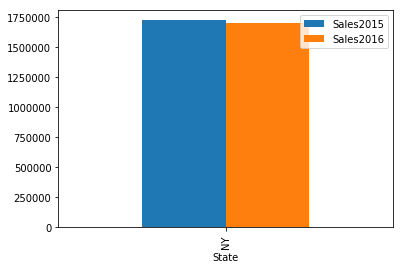

In [7]:
East_table=East_table.groupby('State')[['Sales2015','Sales2016']].sum().reset_index()

New=East_table



Null_value=float('NaN')

for x in range(0,16):
    if((New.Sales2015.iloc[x])<(New.Sales2016.iloc[x])):
        New.State.iloc[x]=Null_value
        
        
New.dropna(inplace=True)

New.set_index('State',inplace=True)

New.plot.bar()


New=New.reset_index()

print('4. Thus we can conclude that there is just one state in which the total sales of 2015 is greater than 2016 and that is',New.State.iloc[0])
        

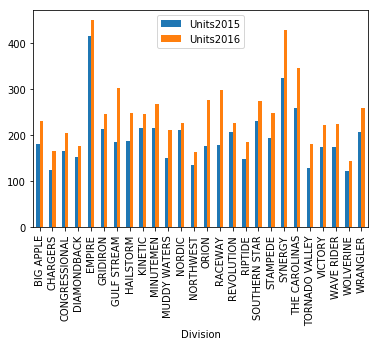

In [8]:
Tier_Data=Sales_Data[Sales_Data.Tier=='High']

Tier_Data.groupby('Division')[['Units2015','Units2016']].sum().plot.bar()

In [9]:
High_Data=Tier_Data.groupby('Division')[['Units2015','Units2016']].sum().reset_index()

Null_value=float('NaN')

for x in range(0,26):
    if((High_Data.Units2015.iloc[x])<(High_Data.Units2016.iloc[x])):
        High_Data.Division.iloc[x]=Null_value
        
        
High_Data.dropna(inplace=True)

print(High_Data)

print('5. Thus we can conclude that there is no division in which the total units sold in 2015 is greater than 2016')
        

Empty DataFrame
Columns: [Division, Units2015, Units2016]
Index: []
5. Thus we can conclude that there is no division in which the total units sold in 2015 is greater than 2016


In [10]:
Sales_Data['Date']=pd.to_datetime(Sales_Data.Month,format='%b')

Sales_Data['Qtr'] = pd.to_datetime(Sales_Data.Date).dt.quarter

Sales_Data['Qtr'] = 'Q' + Sales_Data['Qtr'].astype(str)

Sales_Data.drop(columns=['Date'],inplace=True)

Sales_Data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


7. Qtr wise sales in 2015 and 2016 


Text(0, 0.5, 'Total Sales')

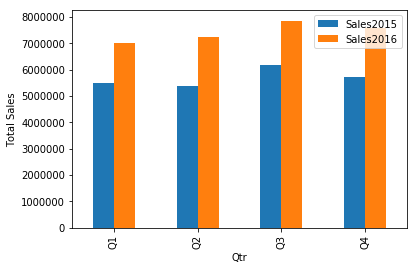

In [11]:
print("7. Qtr wise sales in 2015 and 2016 ")

Sales_Data.groupby('Qtr')[['Sales2015','Sales2016']].sum().plot.bar()
plt.ylabel("Total Sales")

In [12]:
Pie_Table=Sales_Data.groupby(['Qtr','Tier'])[['Sales2016']].sum().reset_index()


for i in range(0,16):
    if(Pie_Table.Sales2016[i]<0):
        Pie_Table.Sales2016[i]=Pie_Table.Sales2016[i]*(-1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


 Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart are


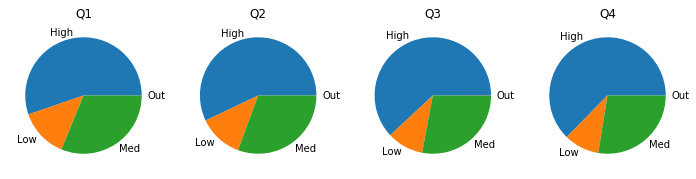

In [14]:
print(" Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart are")


N=len(Pie_Table.Qtr.unique())
fig,axs=plt.subplots(1,N, figsize=(3*N,3), subplot_kw={'aspect':'equal'})
for ax,(groupname,subdf) in zip(axs,Pie_Table.groupby('Qtr')):
    ax.pie(subdf.Sales2016, labels=subdf.Tier)
    ax.set_title(groupname)